In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import cv2
import os

In [4]:
def srcnn_model():
    input_shape = (None, None, 3)  # Assuming RGB images

    # Input layer
    inputs = Input(shape=input_shape)

    # Feature extraction layer
    x = Conv2D(filters=64, kernel_size=(9, 9), padding='same', activation='relu')(inputs)

    # Non-linear mapping layer
    x = Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu')(x)

    # Reconstruction layer (output layer)
    output = Conv2D(filters=3, kernel_size=(5, 5), padding='same')(x)

    # Define the model
    model = Model(inputs=inputs, outputs=output)

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
    
    return model


In [5]:
def load_images_from_directory(directory, target_size=None):
    images = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img = cv2.imread(os.path.join(directory, filename), cv2.IMREAD_COLOR)
            if target_size:
                img = cv2.resize(img, target_size)
            img = img.astype('float32') / 255.0  # Normalize image
            images.append(img)
    return np.array(images)

# Load training and validation data
train_lr_dir = r'C:\Users\92317\Downloads\archive (16)\dataset\train\low_res'  # Replace with your LR image directory path
train_hr_dir = r'C:\Users\92317\Downloads\archive (16)\dataset\train\high_res'  # Replace with your HR image directory path
val_lr_dir = r'C:\Users\92317\Downloads\archive (16)\dataset\val\low_res'      # Replace with your validation LR image directory path
val_hr_dir = r'C:\Users\92317\Downloads\archive (16)\dataset\val\high_res'      # Replace with your validation HR image directory path

target_size = (128, 128)  # Resize images to 128x128, change based on your dataset

# Load train and validation datasets
X_train = load_images_from_directory(train_lr_dir, target_size)
Y_train = load_images_from_directory(train_hr_dir, target_size)
X_val = load_images_from_directory(val_lr_dir, target_size)
Y_val = load_images_from_directory(val_hr_dir, target_size)

# Check dataset sizes
print(f"Train LR images: {X_train.shape}, Train HR images: {Y_train.shape}")
print(f"Val LR images: {X_val.shape}, Val HR images: {Y_val.shape}")


Train LR images: (685, 128, 128, 3), Train HR images: (685, 128, 128, 3)
Val LR images: (170, 128, 128, 3), Val HR images: (170, 128, 128, 3)


In [6]:
# Initialize the SRCNN model
model = srcnn_model()

# Train the model using your training and validation datasets
history = model.fit(X_train, Y_train, epochs=50, batch_size=16, validation_data=(X_val, Y_val))

# Save the trained model
model.save('srcnn_model.h5')

Epoch 1/50
43/43 [==============================] - 124s 3s/step - loss: 0.0298 - accuracy: 0.4797 - val_loss: 0.0098 - val_accuracy: 0.7027
Epoch 2/50
43/43 [==============================] - 118s 3s/step - loss: 0.0077 - accuracy: 0.6644 - val_loss: 0.0061 - val_accuracy: 0.7182
Epoch 3/50
43/43 [==============================] - 119s 3s/step - loss: 0.0049 - accuracy: 0.7020 - val_loss: 0.0043 - val_accuracy: 0.7360
Epoch 4/50
43/43 [==============================] - 121s 3s/step - loss: 0.0038 - accuracy: 0.7325 - val_loss: 0.0036 - val_accuracy: 0.7272
Epoch 5/50
43/43 [==============================] - 120s 3s/step - loss: 0.0033 - accuracy: 0.7335 - val_loss: 0.0039 - val_accuracy: 0.6854
Epoch 6/50
43/43 [==============================] - 120s 3s/step - loss: 0.0034 - accuracy: 0.7640 - val_loss: 0.0027 - val_accuracy: 0.8206
Epoch 7/50
43/43 [==============================] - 120s 3s/step - loss: 0.0025 - accuracy: 0.7694 - val_loss: 0.0024 - val_accuracy: 0.7740
Epoch 8/50
43

c:\Users\92317\Desktop\ML\sklearn-env\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 50ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


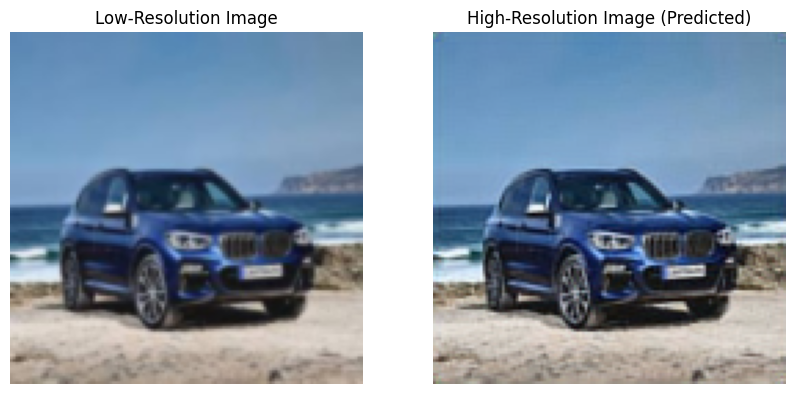

In [8]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load single image for testing
def load_single_image(image_path, target_size=None):
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)  # Read the image in BGR format
    if img is not None and target_size:
        img = cv2.resize(img, target_size)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = img.astype('float32') / 255.  # Normalize to range [0, 1]
    return img

# Function to enhance image using trained SRCNN model
def enhance_image(model, low_res_image):
    low_res_image = np.expand_dims(low_res_image, axis=0)  # Add batch dimension
    high_res_image = model.predict(low_res_image)
    return high_res_image.squeeze()  # Remove batch dimension

# Load a test image
low_res_test = load_single_image(r'C:\Users\92317\Desktop\ML\car.jpeg', target_size=(128, 128))

# Generate the high-resolution image
high_res_result = enhance_image(model, low_res_test)

# Show low-res and high-res images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Low-Resolution Image')
plt.imshow(low_res_test)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('High-Resolution Image (Predicted)')
plt.imshow(high_res_result)
plt.axis('off')

plt.show()


In [2]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('srcnn_model.h5')

In [7]:
import os

image_path = r'C:\Users\92317\Desktop\ML\flower.jpg'
if not os.path.exists(image_path):
    print("File not found!")
else:
    print("File exists!")

File exists!


1/1 [==============================] - 0s 415ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


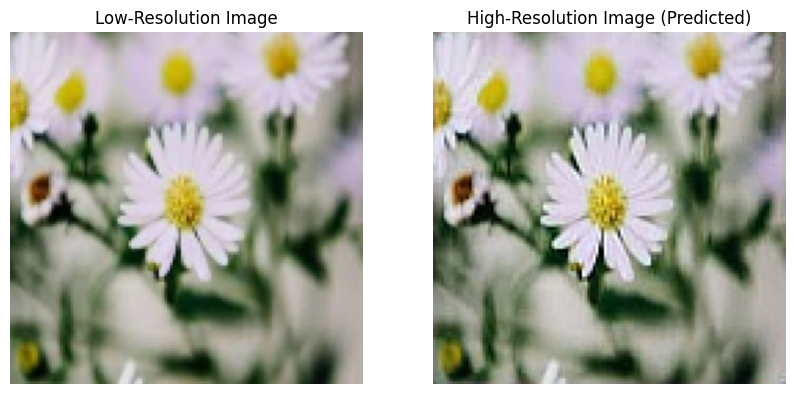

In [8]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load single image for testing
def load_single_image(image_path, target_size=None):
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)  # Read the image in BGR format
    if img is not None and target_size:
        img = cv2.resize(img, target_size)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = img.astype('float32') / 255.  # Normalize to range [0, 1]
    return img

# Function to enhance imbge using trained SRCNN model
def enhance_image(model, low_res_image):
    low_res_image = np.expand_dims(low_res_image, axis=0)  # Add batch dimension
    high_res_image = model.predict(low_res_image)
    return high_res_image.squeeze()  # Remove batch dimension

# Load a test image
low_res_test = load_single_image(r'C:\Users\92317\Desktop\ML\flower.jpg', target_size=(128, 128))

# Generate the high-resolution image
high_res_result = enhance_image(model, low_res_test)

# Show low-res and high-res images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Low-Resolution Image')
plt.imshow(low_res_test)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('High-Resolution Image (Predicted)')
plt.imshow(high_res_result)
plt.axis('off')

plt.show()
